## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the plot
- `pandas` for data manipulation
- `numpy` for data generation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Dataset

We use `np.random.normal()` to create **normally distributed** data for `'Group A'` and `'Group B'`, but with different `means`.

In [2]:
# Generate data for Group A (Normal Distribution)
group_a = np.random.normal(loc=50, scale=10, size=1000)

# Generate data for Group B (Skewed Distribution)
group_b = np.random.normal(loc=20, scale=10, size=1000)

# Create a DataFrame
df = pd.DataFrame({'Group': ['Group A'] * 1000 + ['Group B'] * 1000,
                   'Value': np.concatenate((group_a, group_b))})

## Basic grouped boxplot

Once we've opened our dataset, we'll now **create the graph**. The following displays the **distribution** of both groups using the `boxplot()` function.

- **Data Grouping**: Groups the data in a DataFrame `'df'` based on the `'Group'` column. Selects the `'Value'` column from each group, creating a series of grouped values.

- **Box Plot Creation**: Creates a [boxplot](https://python-graph-gallery.com/boxplot/) on the `'ax'` axes. Uses data from the grouped values to form the boxes. **Labels each box** with the unique group names from the `'Group'` column.

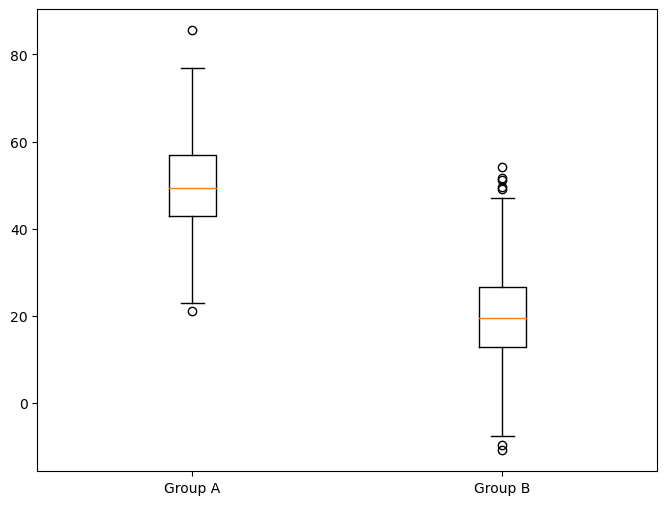

In [3]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8,6))

# Create the plot
ax.boxplot(x=[group.values for name, group in grouped],
           labels=grouped.groups.keys())

# Display it
plt.show()

## Different color for each group

- We use the `patch_artist=True` parameter in the [boxplot](https://python-graph-gallery.com/boxplot/) function to enable the ability to **set individual colors** for each box

- We define a **list of colors** that correspond to each group

- We **iterate through the boxes** in the [boxplot](https://python-graph-gallery.com/boxplot/) and set their face colors based on the defined colors for each group

This will **color each group** with a different color in your boxplot. You can adjust the colors list to specify the **colors you want** for each group.

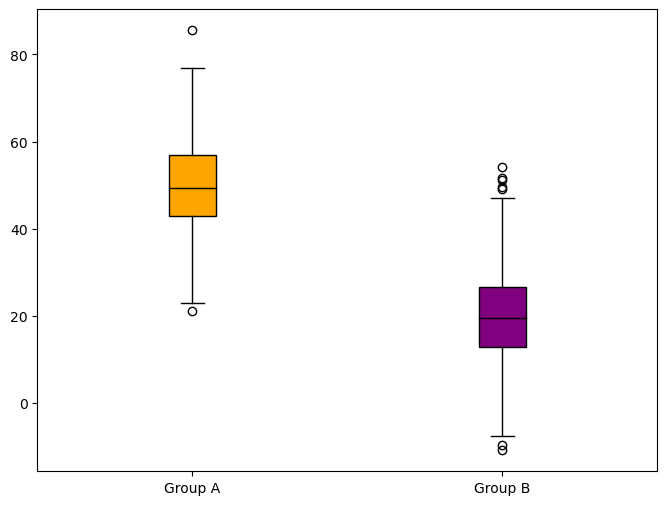

In [4]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Display it
plt.show()

## Custom legend

We first create **legend labels** (`legend_labels`) and **legend handles** (`legend_handles`) for each group. Then, we use `ax.legend()` to add the legend to the plot, specifying the **handles** and **labels**. This will help viewers understand which color corresponds to each group in your boxplot.

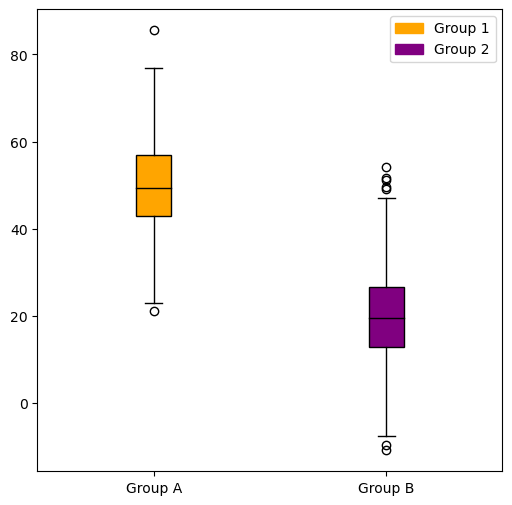

In [5]:
# Group our dataset with our 'Group' variable
grouped = df.groupby('Group')['Value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['orange', 'purple']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)

# Create a legend for the groups
legend_labels = ['Group 1', 'Group 2']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)
    
# Display it
plt.show()

## Going further

This post explains how to create a grouped boxplot with [matplotlib](https://python-graph-gallery.com/matplotlib/).

For more examples of **how to create or customize** your boxplots, see the [boxplot section](https://python-graph-gallery.com/boxplot/). You may also be interested in how to created an [boxplot with multiple groups](https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/).